In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [109]:
df = pd.read_csv("merged.csv")

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    4600 non-null   int64  
 1   country                       4600 non-null   object 
 2   country_code                  4600 non-null   object 
 3   year                          4600 non-null   int64  
 4   health_exp                    4600 non-null   float64
 5   life_expect                   4600 non-null   float64
 6   maternal_mortality            4600 non-null   int64  
 7   infant_mortality              4600 non-null   float64
 8   neonatal_mortality            4600 non-null   float64
 9   under_5_mortality             4600 non-null   float64
 10  inci_tuberc                   4600 non-null   float64
 11  prev_undernourishment         4600 non-null   float64
 12  Geographical subregion        4163 non-null   object 
 13  Con

In [111]:
df.drop(df.columns[[0,2,14,15,16,17,18,19,20,21]], axis=1, inplace=True)


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 4600 non-null   object 
 1   year                    4600 non-null   int64  
 2   health_exp              4600 non-null   float64
 3   life_expect             4600 non-null   float64
 4   maternal_mortality      4600 non-null   int64  
 5   infant_mortality        4600 non-null   float64
 6   neonatal_mortality      4600 non-null   float64
 7   under_5_mortality       4600 non-null   float64
 8   inci_tuberc             4600 non-null   float64
 9   prev_undernourishment   4600 non-null   float64
 10  Geographical subregion  4163 non-null   object 
 11  Continental region      4163 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 431.4+ KB


In [113]:
df.describe()

,year,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,inci_tuberc,prev_undernourishment
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,2011.000000,6.182907,69.878327,184.432174,27.732749,15.741167,38.512275,134.357928,11.434812
std,6.633971,2.740284,8.628714,258.887493,24.963637,12.462214,39.745232,185.610326,10.841945
min,2000.000000,1.107200,41.957000,1.000000,1.500000,0.800000,1.900000,0.000000,1.100000
25%,2005.000000,4.163175,64.421750,16.000000,7.700000,4.900000,9.100000,17.000000,2.600000
50%,2011.000000,5.554389,71.766427,65.000000,18.350000,11.700000,21.600000,57.000000,7.200000
75%,2017.000000,7.897373,76.188854,261.000000,42.500000,24.800000,57.700000,189.000000,16.600000
max,2022.000000,21.827950,84.560000,1687.000000,138.300000,62.700000,228.400000,1590.000000,67.400000


In [114]:
df.dropna(inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4163 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 4163 non-null   object 
 1   year                    4163 non-null   int64  
 2   health_exp              4163 non-null   float64
 3   life_expect             4163 non-null   float64
 4   maternal_mortality      4163 non-null   int64  
 5   infant_mortality        4163 non-null   float64
 6   neonatal_mortality      4163 non-null   float64
 7   under_5_mortality       4163 non-null   float64
 8   inci_tuberc             4163 non-null   float64
 9   prev_undernourishment   4163 non-null   float64
 10  Geographical subregion  4163 non-null   object 
 11  Continental region      4163 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 422.8+ KB


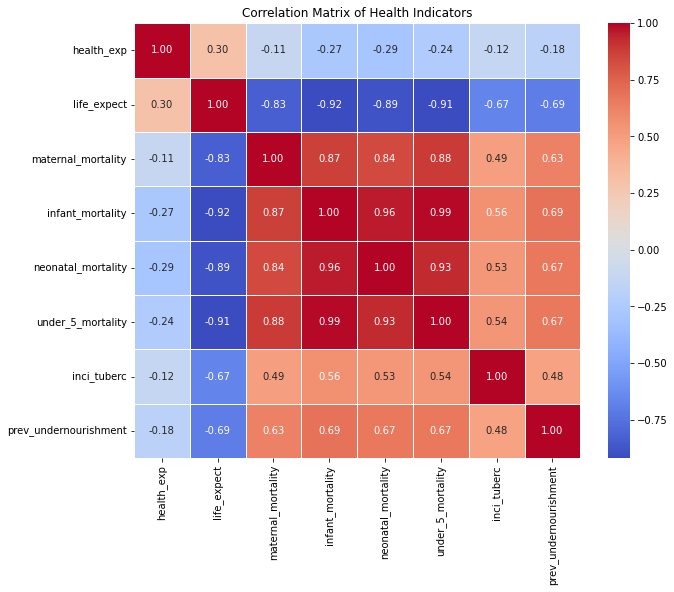

In [116]:
cols = ['health_exp', 'life_expect', 'maternal_mortality', 'infant_mortality', 
                'neonatal_mortality', 'under_5_mortality', 'inci_tuberc', 'prev_undernourishment']
corr_data = df[cols]
corr_matrix = corr_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Health Indicators')
plt.show()

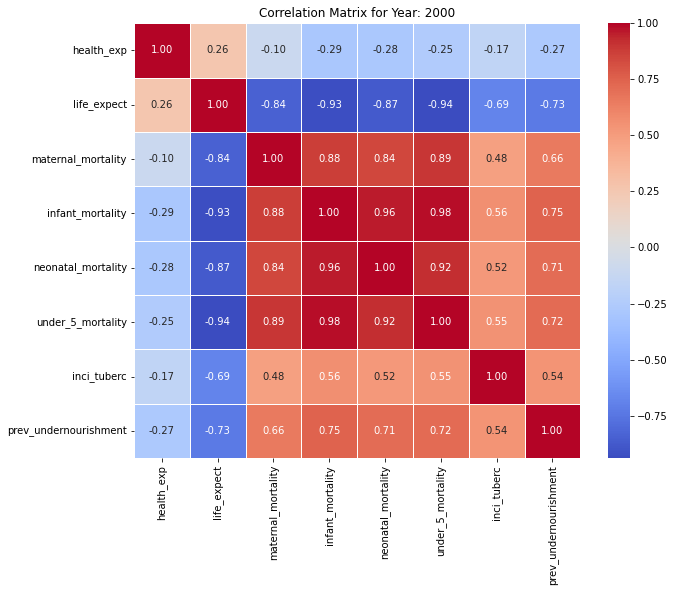

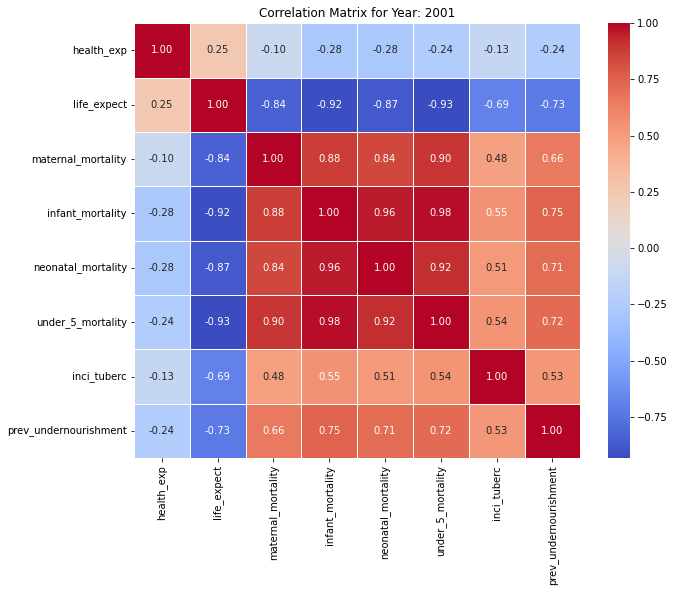

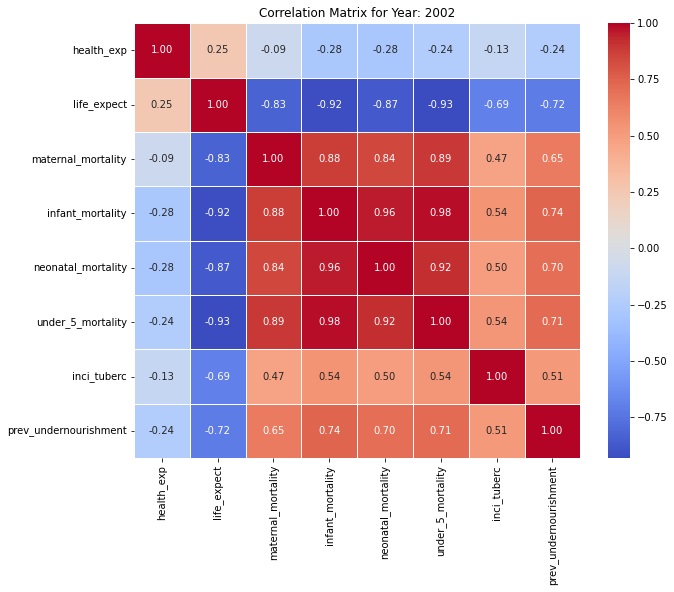

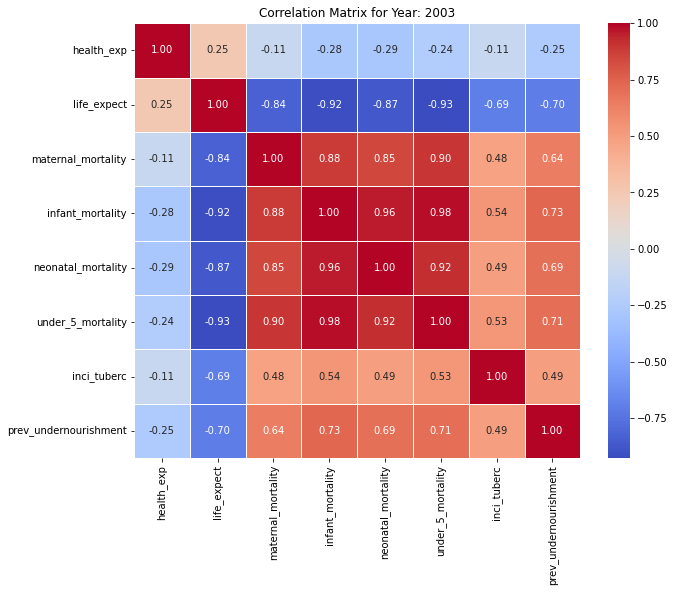

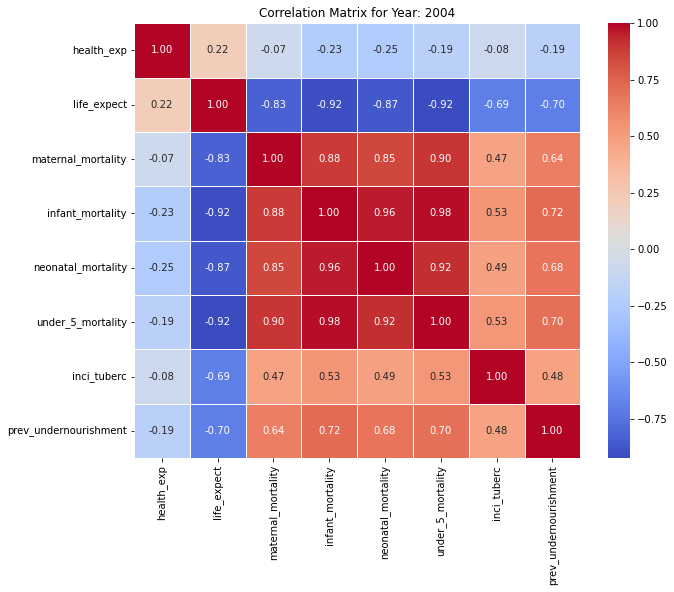

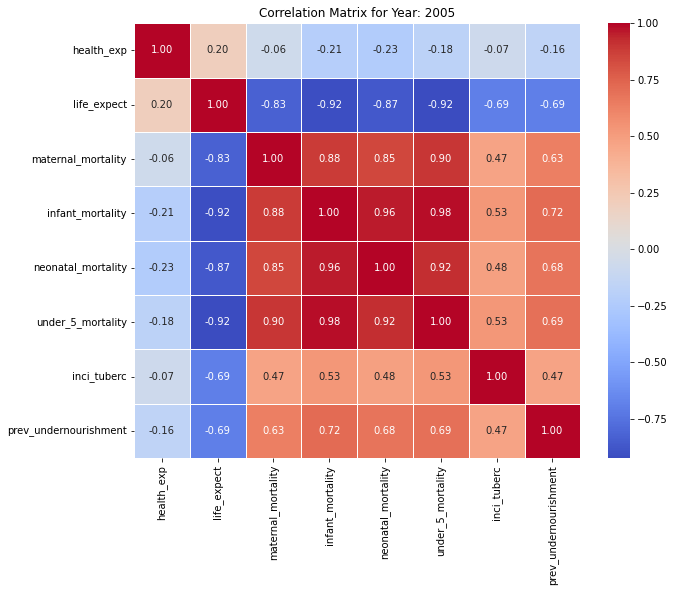

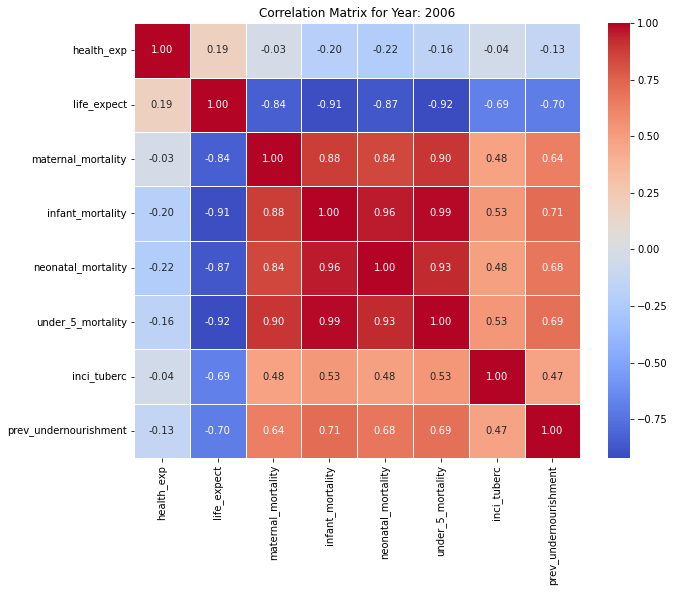

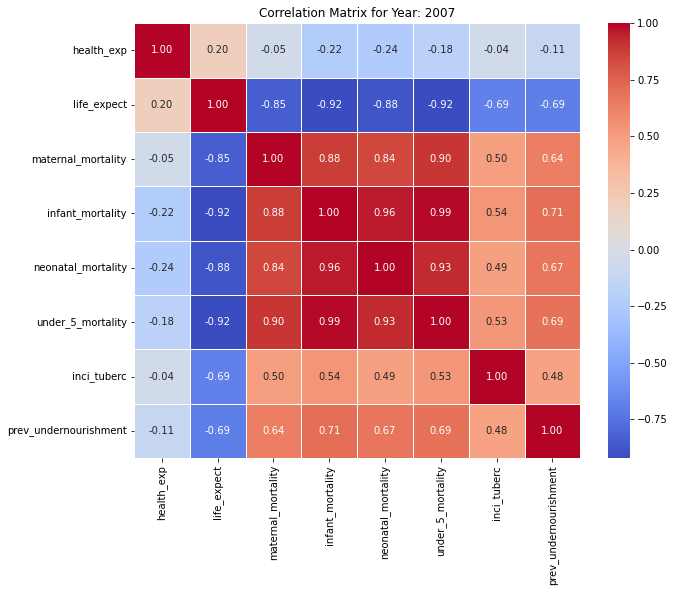

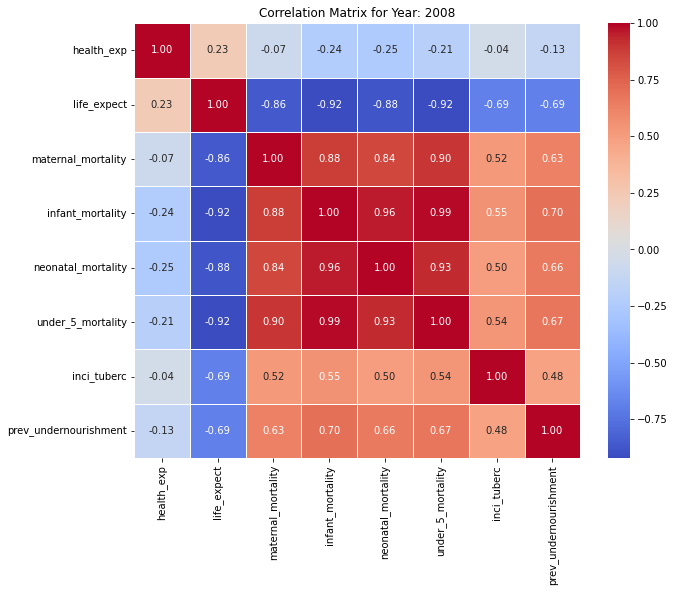

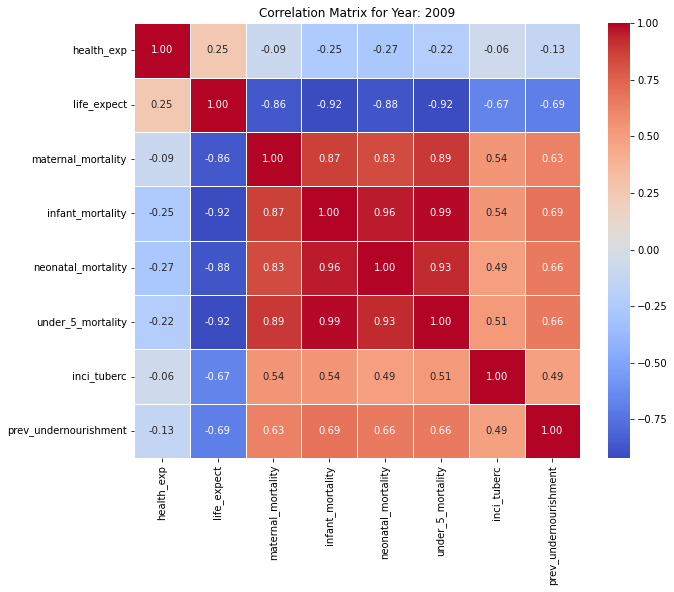

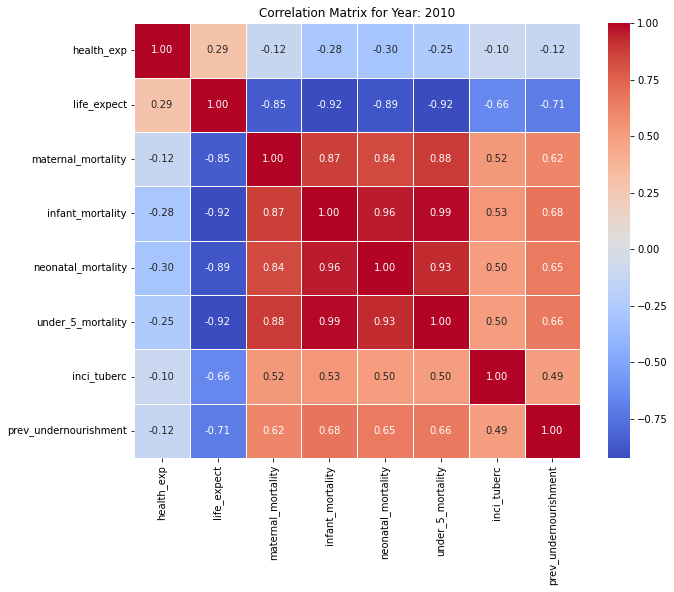

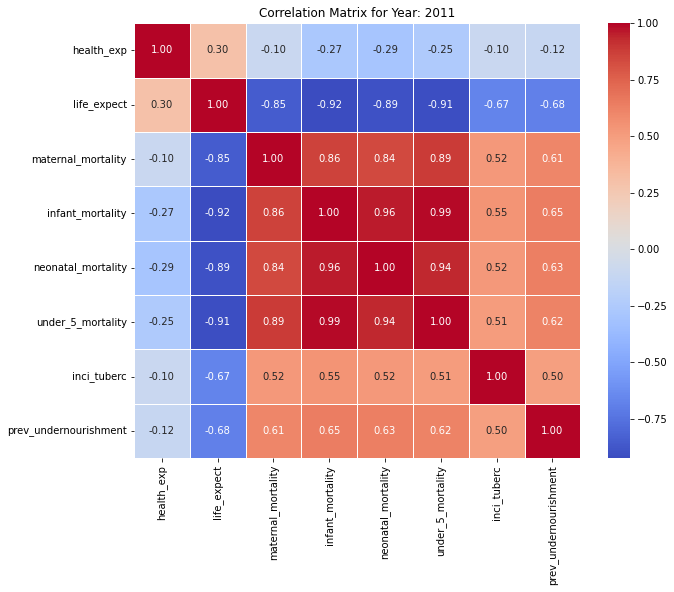

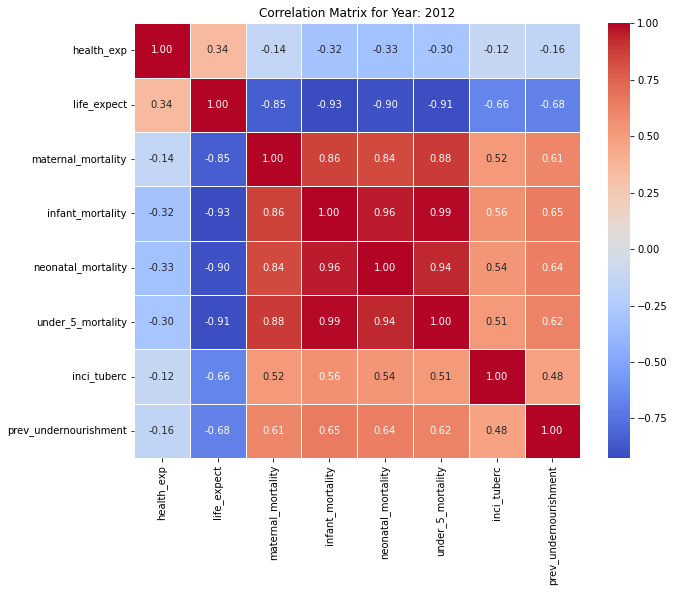

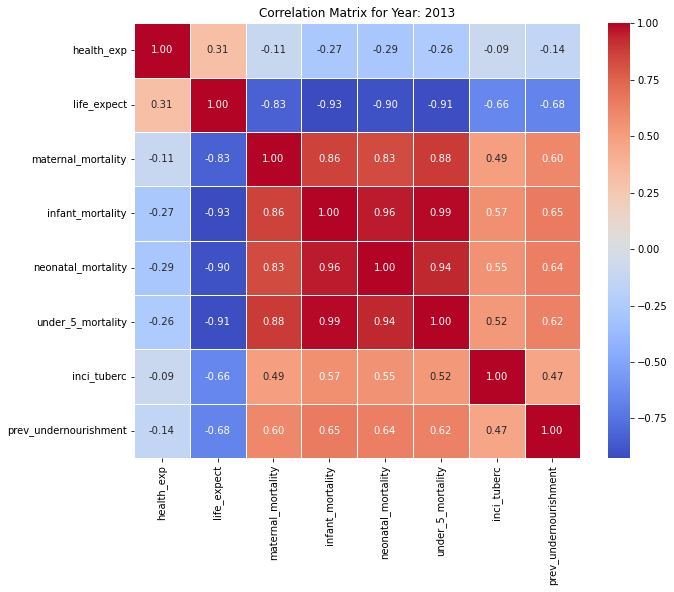

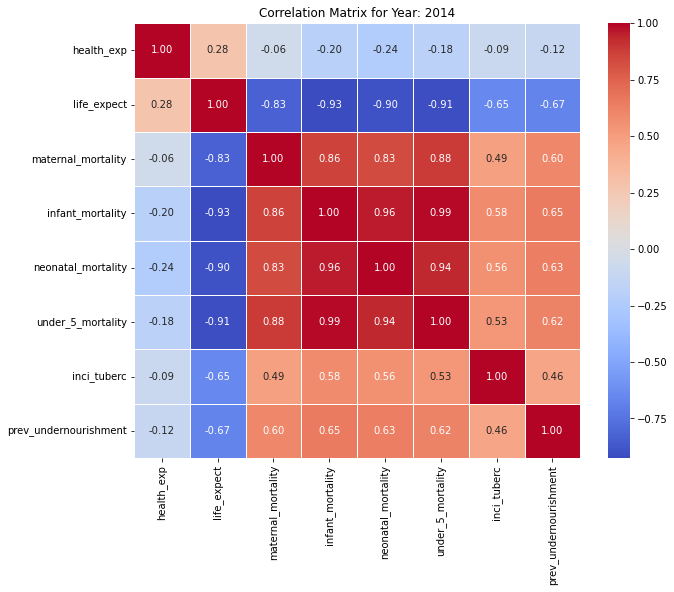

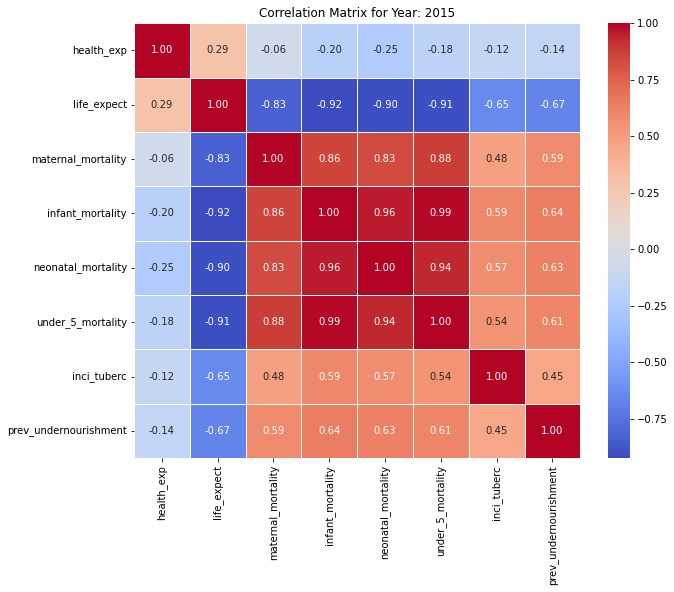

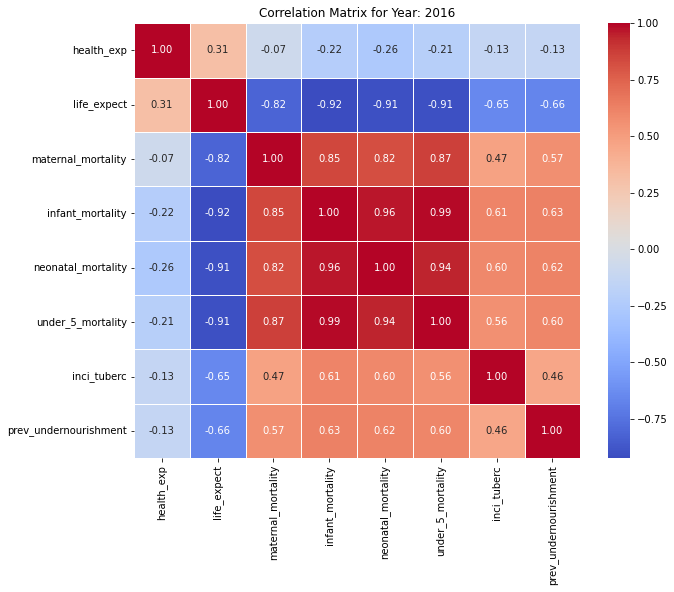

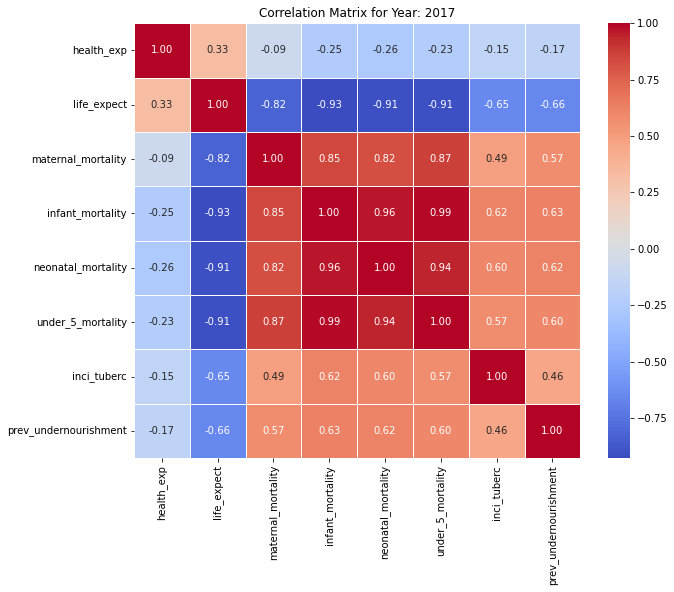

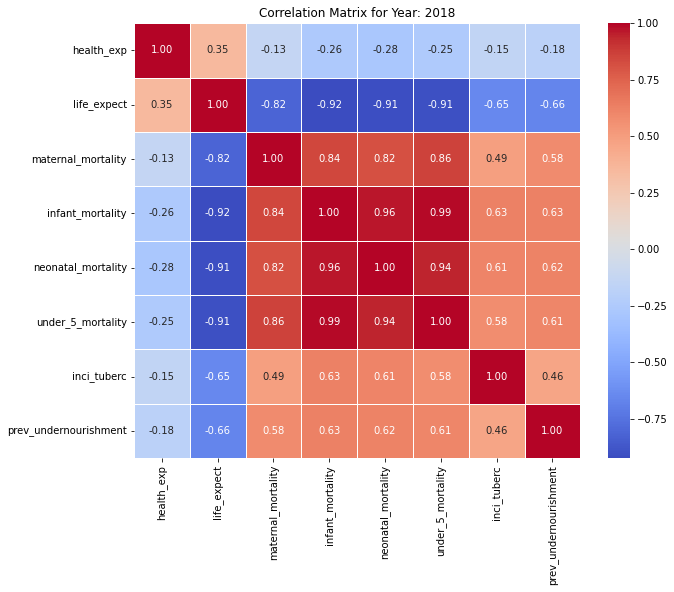

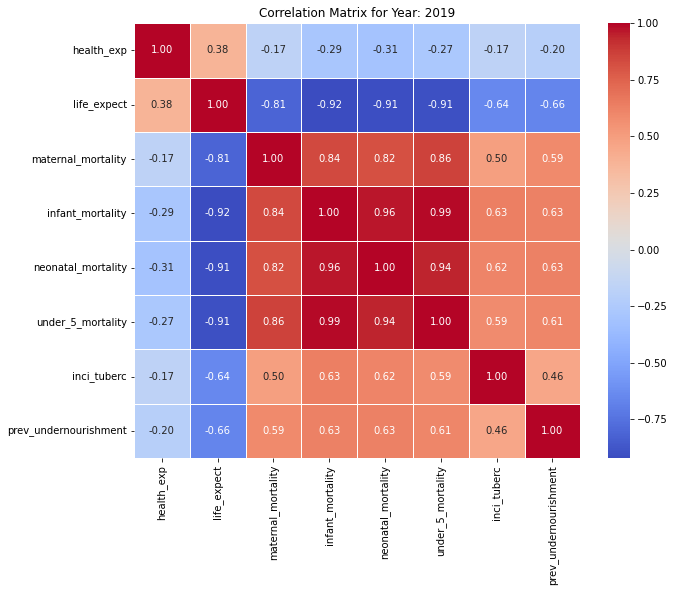

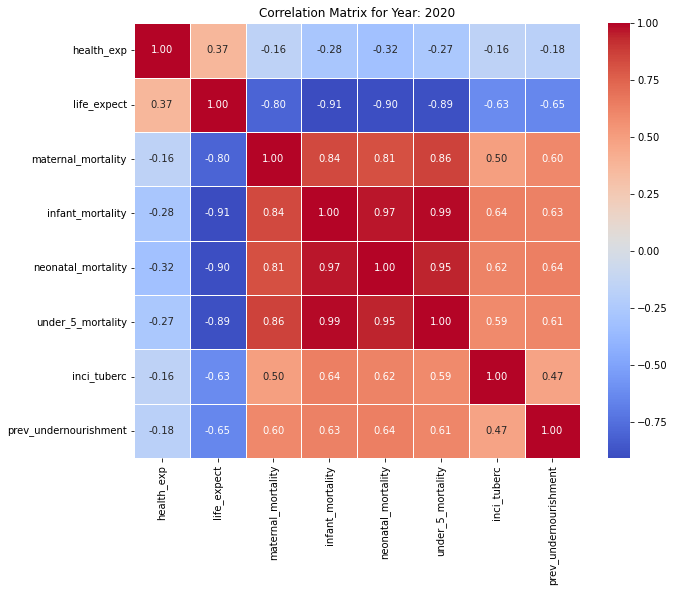

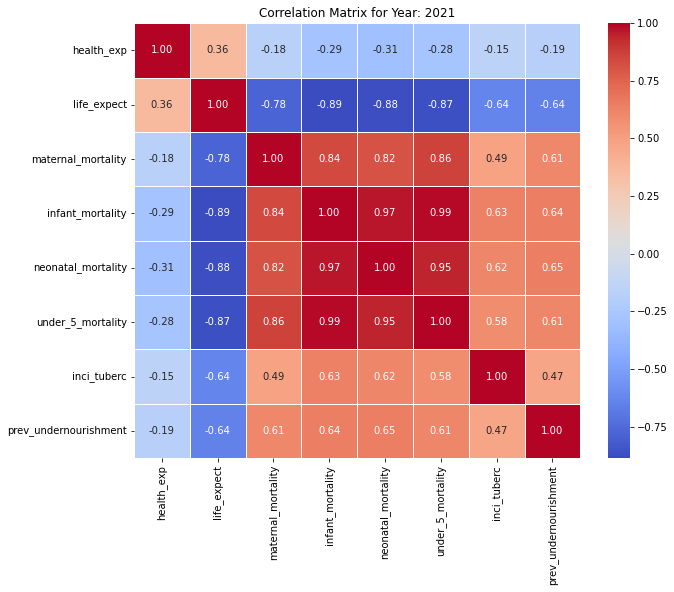

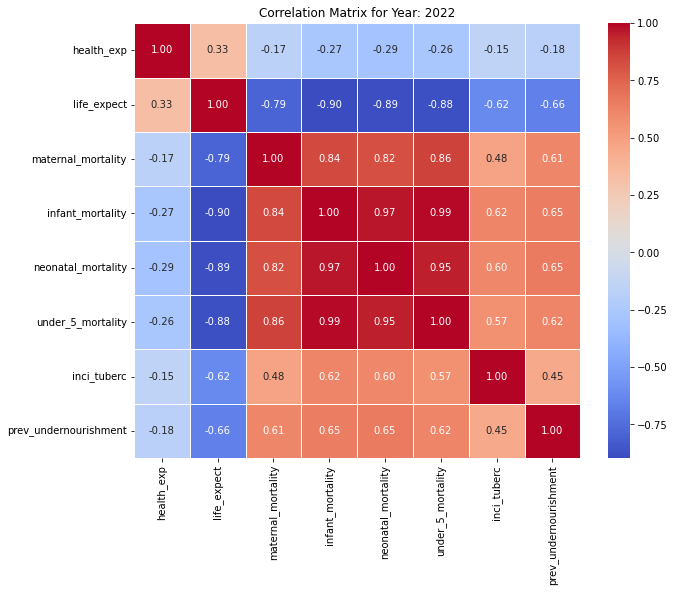

In [117]:
correlations_by_year = df.groupby('year')[cols].corr()

# Loop through each year and plot the correlation heatmap
for year in correlations_by_year.index.levels[0]:
    plt.figure(figsize=(10, 8))  # Set the size of the plot
    sns.heatmap(correlations_by_year.loc[year], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Matrix for Year: {year}')
    plt.show()

Lets start with clustering analysis... here countries will be clustured based on their performance on various health indicators.It will guide in policy formation towards tackling various challenges and will guide in efficient resource allocation. Countries with favourable health profile can also be served as case studies.

We will first start by clustering countries based on thier mortality profiles and health expenditure.

In [172]:
#First, we will filter out data for year 2022 as our clustering analysis will consider only latest data for clustering purposes
#It will be more useful for clustering countries for a single year. Data for multiple years at once will make it difficult to separate out countries

df_2022 = df[df['year'] == 2022]


In [215]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_2022[['infant_mortality','prev_undernourishment']]
X_scaled = scaler.fit_transform(X)

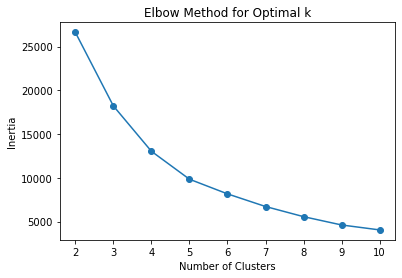

In [216]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

C:\Users\apraj\AppData\Local\Temp/ipykernel_35384/638355064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Cluster'] = kmeans.fit_predict(X)


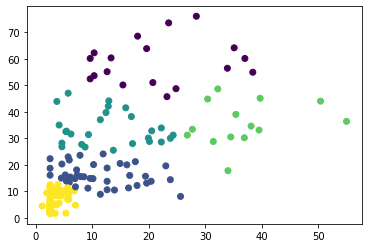

In [228]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_2022['Cluster'] = kmeans.fit_predict(X)

plt.scatter(df_2022['prev_undernourishment'], df_2022['infant_mortality'], c=df_2022['Cluster'], cmap='viridis')

plt.show()

In [234]:
from scipy.stats import zscore

# Calculate Z-scores for the MPS_Scaled and Health_Expenditure_Scaled columns
df_2022['infant_mortality_ZScore'] = zscore(df_2022['infant_mortality'])
df_2022['health_exp_Zscore'] = zscore(df_2022['health_exp'])

# Filter out rows where the Z-score is above 3 or below -3
filtered_data = df_2022[(df_2022['prev_undernourishment'].abs() <= 30) & (df_2022['infant_mortality'].abs() <= 40)]

C:\Users\apraj\AppData\Local\Temp/ipykernel_35384/3927883241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['infant_mortality_ZScore'] = zscore(df_2022['infant_mortality'])
C:\Users\apraj\AppData\Local\Temp/ipykernel_35384/3927883241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['health_exp_Zscore'] = zscore(df_2022['health_exp'])


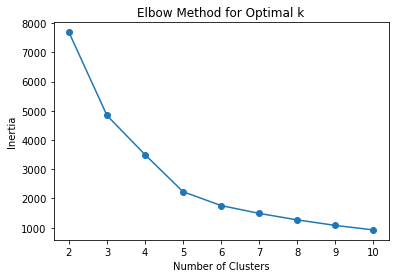

In [235]:
X = filtered_data[['infant_mortality','prev_undernourishment']]
X_scaled = scaler.fit_transform(X)
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

C:\Users\apraj\AppData\Local\Temp/ipykernel_35384/3420985478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.fit_predict(X)


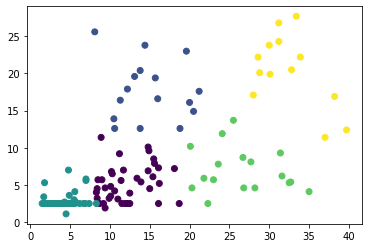

In [237]:
kmeans = KMeans(n_clusters=5, random_state=42)
filtered_data['Cluster'] = kmeans.fit_predict(X)

plt.scatter(filtered_data['infant_mortality'], filtered_data['prev_undernourishment'], c=filtered_data['Cluster'], cmap='viridis')
plt.show()

In [238]:
df_year_2022 = df[df['year'] == 2022]
features = ['prev_undernourishment', 'infant_mortality','neonatal_mortality','under_5_mortality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_year_2022[features])

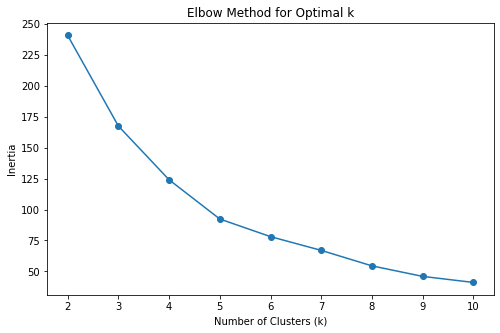

In [239]:
inertia = []
k_range = range(2, 11)

# Calculate inertia for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

C:\Users\apraj\AppData\Local\Temp/ipykernel_35384/934037344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_2022['Cluster'] = clusters


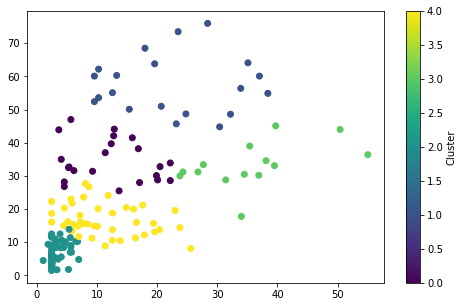

Cluster Centers (Centroids):
[[ 0.1333222   0.84036945  1.03303408  0.73695846]
 [ 1.06427556  2.12835308  1.94561029  2.21357845]
 [-0.69171971 -0.77819288 -0.81869964 -0.72971804]
 [ 2.27292218  0.76847972  0.82886987  0.72335825]
 [ 0.05036453 -0.15721227 -0.10908203 -0.22720378]]


In [241]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)  # Assign each data point to a cluster

# Add the cluster labels to your data (optional, for later inspection)
df_year_2022['Cluster'] = clusters

# Step 7: Visualize the Clusters
plt.figure(figsize=(8, 5))
plt.scatter(df_year_2022['prev_undernourishment'], df_year_2022['infant_mortality'], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster')
plt.show()

print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

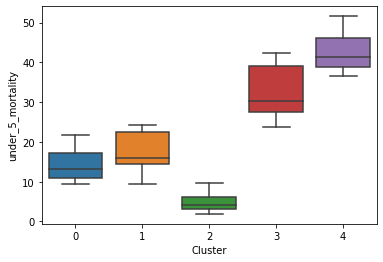

In [242]:
import seaborn as sns
sns.boxplot(x='Cluster', y='under_5_mortality', data=filtered_data)
plt.show()

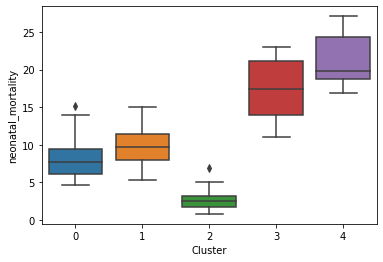

In [243]:
sns.boxplot(x='Cluster', y='neonatal_mortality', data=filtered_data)
plt.show()

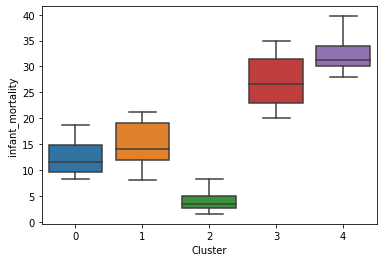

In [244]:
sns.boxplot(x='Cluster', y='infant_mortality', data=filtered_data)
plt.show()

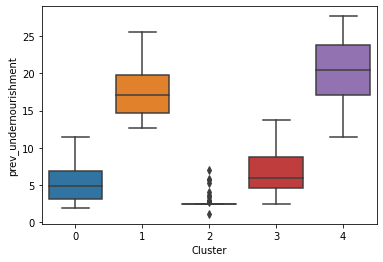

In [246]:
sns.boxplot(x='Cluster', y='prev_undernourishment', data=filtered_data)
plt.show()

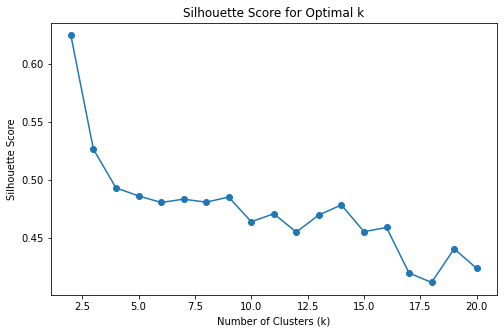

The optimal number of clusters based on Silhouette Score is: 2


In [240]:
from sklearn.metrics import silhouette_score

sil_scores = []
k_range = range(2, 21)  # We need at least 2 clusters to calculate Silhouette Score

# Calculate Silhouette Scores for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Calculate silhouette score for the current clustering
    score = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(score)

# Plot the Silhouette scores for each k
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Print the highest silhouette score and its corresponding k value
best_k = k_range[sil_scores.index(max(sil_scores))]
print(f"The optimal number of clusters based on Silhouette Score is: {best_k}")

C:\Users\apraj\AppData\Local\Temp/ipykernel_35384/2316540460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_2022['Cluster'] = clusters


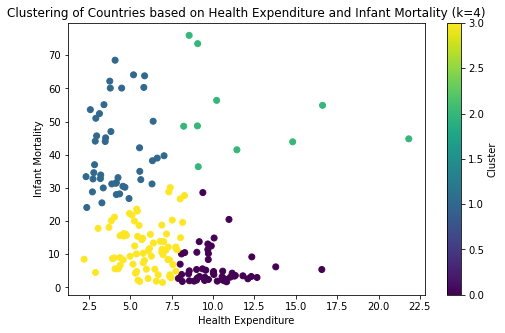

Cluster Centers (Centroids):
[[ 0.99975762 -0.76082688]
 [-0.93603794  1.21114352]
 [ 1.58644177  1.84667275]
 [-0.36318661 -0.40766975]]


In [68]:
# Step 6: Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)  # Assign each data point to a cluster

# Add the cluster labels to your data (optional, for later inspection)
df_year_2022['Cluster'] = clusters

# Step 7: Visualize the Clusters
plt.figure(figsize=(8, 5))
plt.scatter(df_year_2022['health_exp'], df_year_2022['infant_mortality'], c=clusters, cmap='viridis')
plt.xlabel('Health Expenditure')
plt.ylabel('Infant Mortality')
plt.title('Clustering of Countries based on Health Expenditure and Infant Mortality (k=4)')
plt.colorbar(label='Cluster')
plt.show()

print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

In [70]:
clustered_countries = df_year_2022[['country', 'Cluster']]
grouped_countries = clustered_countries.groupby('Cluster')['country'].apply(list)
for cluster_num, countries in grouped_countries.items():
    print(f"Cluster {cluster_num}: {', '.join(countries)}")

Cluster 0: Argentina, Armenia, Australia, Austria, Barbados, Belgium, Bosnia and Herzegovina, Brazil, Bulgaria, Canada, Chile, Colombia, Croatia, Cuba, Cyprus, Czechia, Denmark, Ecuador, El Salvador, Finland, France, Germany, Greece, Honduras, Iceland, Israel, Italy, Japan, Korea, Rep., Latvia, Lebanon, Maldives, Malta, Micronesia, Fed. Sts., Montenegro, Namibia, Netherlands, New Zealand, Nicaragua, North Macedonia, Norway, Panama, Portugal, Serbia, Slovenia, Spain, Sweden, Switzerland, Ukraine, United Kingdom, United States, Uruguay
Cluster 1: Angola, Bangladesh, Benin, Botswana, Burkina Faso, Cameroon, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Djibouti, Dominican Republic, Equatorial Guinea, Eritrea, Eswatini, Ethiopia, Gabon, Gambia, The, Ghana, Guinea, Haiti, India, Kenya, Lao PDR, Madagascar, Mali, Mauritania, Myanmar, Niger, Nigeria, Pakistan, Papua New Guinea, Senegal, South Sudan, Sudan, Tanzania, Togo, Turkmenistan, Uganda, Yemen, Rep., Zambia, Zimbabwe
Clus

C:\Users\apraj\AppData\Local\Temp/ipykernel_35384/270146248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_2022[mortality_features] = scaler.fit_transform(df_year_2022[mortality_features])
C:\Users\apraj\AppData\Local\Temp/ipykernel_35384/270146248.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_2022['health_exp_scaled'] = scaler.fit_transform(df_year_2022[['health_exp']])
C:\Users\apraj\AppData\Local\Temp/ipykernel_35384/270146248.py:15: SettingWithCopyWarning: 
A value is trying

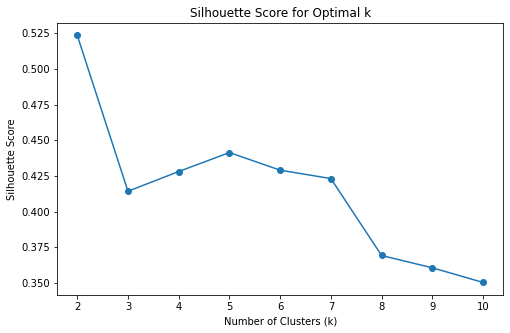

The optimal number of clusters based on Silhouette Score is: 2


In [77]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select the features you want to scale
mortality_features = ['infant_mortality', 'neonatal_mortality', 'maternal_mortality', 'under_5_mortality']

# Step 2: Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Step 3: Apply Min-Max scaling to the mortality features
df_year_2022[mortality_features] = scaler.fit_transform(df_year_2022[mortality_features])

# Optionally: You can also scale health expenditure (if you want to keep the range consistent)
df_year_2022['health_exp_scaled'] = scaler.fit_transform(df_year_2022[['health_exp']])

df_year_2022['mortality_profile'] = df_year_2022[mortality_features].mean(axis=1)
X_scaled = df_year_2022[['health_exp_scaled', 'mortality_profile']].values

sil_scores = []
k_range = range(2, 11)  # We need at least 2 clusters to calculate Silhouette Score

# Calculate Silhouette Scores for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Calculate silhouette score for the current clustering
    score = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(score)

# Plot the Silhouette scores for each k
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Print the highest silhouette score and its corresponding k value
best_k = k_range[sil_scores.index(max(sil_scores))]
print(f"The optimal number of clusters based on Silhouette Score is: {best_k}")

C:\Users\apraj\AppData\Local\Temp/ipykernel_35384/1021846102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_2022['Cluster'] = kmeans.fit_predict(X_scaled)


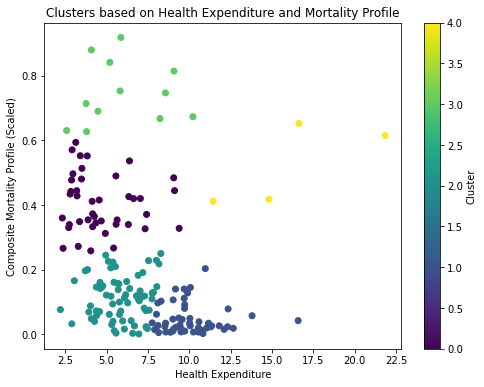

In [82]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_year_2022['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))

# Plot health expenditure on x-axis and mortality profile on y-axis
plt.scatter(df_year_2022['health_exp'], df_year_2022['mortality_profile'], c=df_year_2022['Cluster'], cmap='viridis')
plt.xlabel('Health Expenditure')
plt.ylabel('Composite Mortality Profile (Scaled)')
plt.title('Clusters based on Health Expenditure and Mortality Profile')
plt.colorbar(label='Cluster')
plt.show()

In [289]:
## Forecasting starts

In [290]:
india_data = df[df['country'] == 'Nigeria'][['year', 'infant_mortality']]


In [291]:
india_data['year'] = pd.to_datetime(india_data['year'], format='%Y')  # Ensure 'year' is datetime type
india_data.set_index('year', inplace=True)


In [292]:
train_data = india_data[india_data.index.year <= 2017]
test_data = india_data[india_data.index.year > 2017]

In [293]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [294]:
model = ExponentialSmoothing(train_data['infant_mortality'], trend='add', seasonal= None)
fit_model = model.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [295]:
forecast = fit_model.forecast(steps=5)
print(forecast)


2018-01-01    75.8
2019-01-01    74.6
2020-01-01    73.4
2021-01-01    72.2
2022-01-01    71.0
Freq: YS-JAN, dtype: float64


In [296]:
comparison = pd.DataFrame({
    'Year': forecast.index,
    'Predicted': forecast.values,
    'Actual': test_data['infant_mortality'].values
})
print(comparison)

        Year  Predicted  Actual
0 2018-01-01       75.8    75.7
1 2019-01-01       74.6    74.0
2 2020-01-01       73.4    72.3
3 2021-01-01       72.2    70.5
4 2022-01-01       71.0    68.5


In [297]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
mae = mean_absolute_error(test_data['infant_mortality'], forecast)
mse = mean_squared_error(test_data['infant_mortality'], forecast)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(test_data['infant_mortality'], forecast)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Squared Log Error (MSLE): {msle}')

Mean Absolute Error (MAE): 1.2000000119209175
Mean Squared Error (MSE): 2.144000035643548
Root Mean Squared Error (RMSE): 1.4642404295891942
Mean Squared Log Error (MSLE): 0.00041761716215660066


In [299]:
future_steps = 100  # You can forecast for 20 years, or adjust based on your requirement
extended_forecast = fit_model.forecast(steps=future_steps)

below_10_year = extended_forecast[extended_forecast < 10].index[0]

print(f"The forecasted infant mortality rate will drop below 10 in the year: {below_10_year.year}")

The forecasted infant mortality rate will drop below 10 in the year: 2073
